# Report: Brain Tumor Classification from MRI Imaging


### Capstone Three

Naomi Lopez


### Objective

Brain tumors are a serious health condition that can significantly impact a person’s health and quality of life. Early and accurate detection is critical for effective treatment planning. This capstone project aims to develop a machine learning model capable of identifying and classifying different types of brain tumors from MRI images. Leveraging advanced techniques in image processing and deep learning, the project will focus on enhancing diagnostic accuracy and supporting medical professionals in Radiology and Neuro-Oncology.


The primary objective of this project is to create a robust model that can classify and distinguish between MRI images of four categories: Glioma, Meningioma, Pituitary, and the absence of a tumor (no tumor). Current diagnostic methods are reliant on manual analysis, which is time-consuming and subject to variability.
I will focus on developing and evaluating a Convolutional Neural Network (CNN) with capabilities for image classification, object detection, and segmentation. The solution will include training, validation, and optimization of the model. The main constraints include the quality and quantity of available MRI images, and the computational resources required for model training.

The primary stakeholders are Radiologists, other medical professionals, and biotechnology companies who will use the model to enhance diagnostic accuracy and efficiency. The project could also benefit patients if this technology were to be implemented in medical practice and thereby improving early diagnosis and treatment.

### Background

The dataset comprises 5,249 MRI images of brain tumors, carefully curated and annotated to facilitate the development of machine learning models for tumor detection and classification. The images are divided into training and validation sets, ensuring a balanced representation of each tumor class. 

Data Composition:

● Training Set: 4737 images

- Glioma: 1,153 images
- Meningioma: 1,449 images
- No Tumor: 711 images
- Pituitary: 1,424 images


● Validation Set:  512 images
- Glioma: 136 images
- Meningioma: 140 images
- No Tumor: 100 images
- Pituitary: 136 images

Image Characteristics: The MRI images are captured from various angles, including sagittal, transverse, and coronal views, providing comprehensive coverage of brain anatomy. This diversity could enhance the robustness of models trained on this dataset.


Data Source:
https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

### Importing Data

The primary goal was to accurately to load the training and validation datasets, ensuring that both images and labels were correctly paired and handled.



In [1]:
# Define a function to load images and labels from the specified directory
def load_data(directory):
    images = []
    labels = []
    
    # Loop through each class directory
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)

        # Check if class_path is a directory
        if not os.path.isdir(class_path):
            print(f"Skipping non-directory: {class_path}")
            continue
        
        images_path = os.path.join(class_path, 'images')
        labels_path = os.path.join(class_path, 'labels')

        # Check if both images and labels directories exist
        if not os.path.isdir(images_path) or not os.path.isdir(labels_path):
            print(f"Invalid directory structure in {class_path}. Skipping.")
            continue
        
        # Use class_name as the category label
        category_label = class_name 
        
        # Loop through each image in the images directory
        for image in os.listdir(images_path):
            if image.startswith('.'):  # Skip hidden files
                continue

            img_path = os.path.join(images_path, image)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image {image}, skipping.")
                continue
            
            
            # Corresponding label file
            label_file = image.rsplit('.', 1)[0] + '.txt'  # Match the image and label file names
            label_file_path = os.path.join(labels_path, label_file)
            
            # Check if the label file exists and is not empty
            if os.path.exists(label_file_path):
                with open(label_file_path, 'r') as file:
                    label_data = file.readline().strip()
                    
                    if label_data:  # Ensure label data is not empty
                        images.append(img)
                        labels.append(category_label)  # Append the category label
                    else:
                        print(f"Label file {label_file_path} is empty, skipping this image.")
            else:
                print(f"Label file {label_file_path} not found, skipping this image.")
    
    return images, labels

# Paths to data directories
train_path = '/Users/NaomiLopez/Documents/Springboard/Projects/Capstone_Three/data/Train'
val_path = '/Users/NaomiLopez/Documents/Springboard/Projects/Capstone_Three/data/Val'


The function load_data is designed to systematically navigate through my directory structure, identifying and loading both images and their associated label files for model training and validation.
Key Steps:

1. Initialize Lists: two lists (images and labels) are created to store the loaded image data and their respective category labels.

- The function loops through each subdirectory (representing a category) in the main directory. It ensures that only valid directories are processed by skipping non-directory entries.

2. Image and Label Pairing: For each valid subdirectory:

- It checks for the presence of both 'images' and 'labels' subdirectories. If the expected structure is not present, it skips the folder. It uses the folder name (class_name) as the category label for all images within the subdirectory.

3. Image Loading: 

- The function loops through the images within each class directory, if the image is successfully loaded using cv2.imread, it attempts to find a corresponding label file by matching the image filename (with a .txt extension).
- If the label file exists and is non-empty, the image and its category label are appended to their respective lists. If the label file is missing or empty, the image is skipped.

4. Edge Cases:
- Skips hidden files (starting with a dot).
- Handles errors like invalid or missing label files, empty directories, and failed image loading with informative print statements.

5. Data Paths:

- Paths to the training and validation datasets are specified using variables (train_path and val_path), pointing to the respective directories where images and labels are stored.

##### Loaded 3670 images from 4 categories.
Training Categories: {'No Tumor', 'Pituitary', 'Meningioma', 'Glioma'}

The dataset originally started with 4737 images in the Training categories. However, after uploading and looping through the dataset I ended up with 3670 this is likely due to images without corresponding labels that could have been uploaded incorrectly or acidentally omitted during the data collection process. 


##### Loaded 509 images from 4 categories.
Validation Categories: {'No Tumor', 'Pituitary', 'Meningioma', 'Glioma'}

The Validation set of images started with 512 images and uploading I ended up with 509. Therefore, only three images did not have a corresponding label. 

### Exploratory Data Analysis

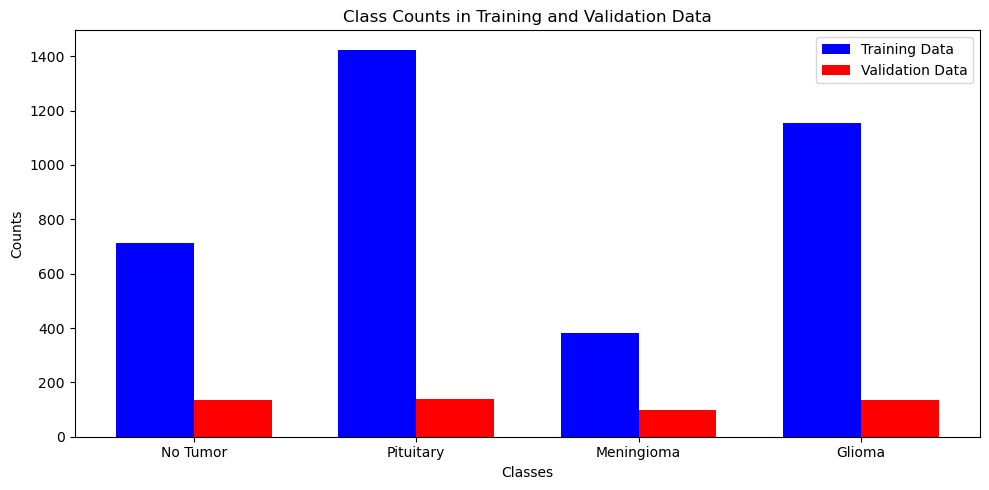

From the graph, you can see that there is a significant imbalance among the Training Classes, with some categories, such as 'Pituitary' and 'Glioma,' having substantially more images compared to Meningioma and No Tumor. This imbalance can lead to bias during model training and evaluation. To address this issue I weighted the classes prior to builing my model. This helps the model train on ALL classes rather than prioritizing the majority, which would lead to bias and insufficient results.

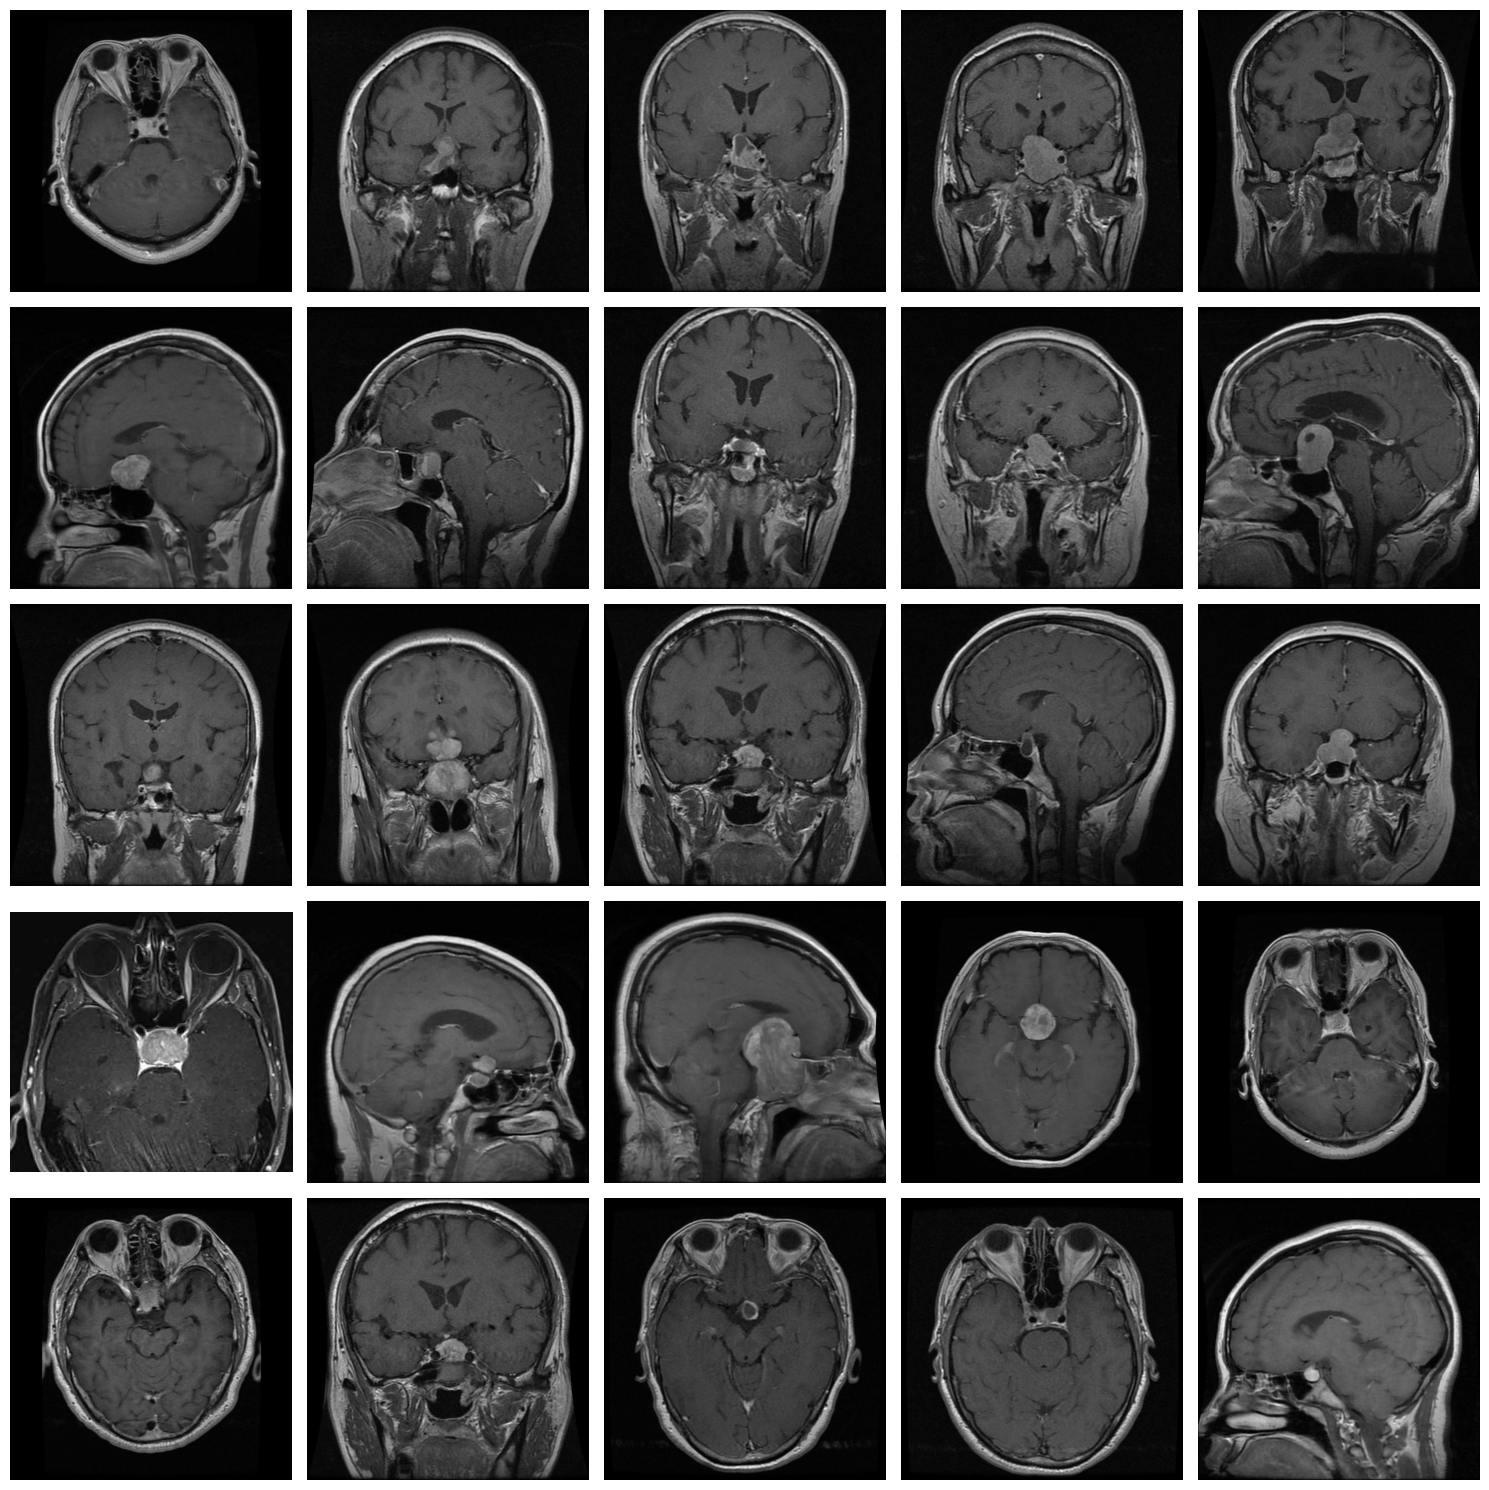

Image: p (532).jpg, Size: 512x512 pixels
Image: p (75).jpg, Size: 512x512 pixels
Image: Tr-pi_1182.jpg, Size: 512x512 pixels
Image: Tr-pi_1196.jpg, Size: 512x512 pixels
Image: Tr-pi_0288.jpg, Size: 512x512 pixels
Image: p (135).jpg, Size: 470x432 pixels

A random selection of 25 UNAGUMENTED images were printed along with their respectives file types and pixel sizes. This helped me gain a better understanding of what the images looked like and determine if they were all of uniform file type and pixel size. 

Based on this assessment, I concluded that the images were predominately 512x512 or 470x432, jpg files, and overall the images had a nice balance of contrast, brightness and image frame. 

It is required that all images are of the same size and augmentation should be conducted in order to increase variation in the images, thus creating a more robust model and avoiding overfitting. 

### Data Cleaning & Image Augmentation

1. Image and Label Loading: 

- The function load_data is designed to read images and their corresponding labels from my directory. It iterates over subdirectories within the main directory, where each subdirectory corresponds to a class label (e.g., categories of images). For each image in the images folder, it checks for a corresponding label file in the labels folder. The images are loaded using OpenCV, and the category label is appended for each valid image-label pair. This was done earlier as well. 

2. Image Preprocessing:

- Resizing: After loading the images, they were resized to a uniform target size of (224, 224) to ensure consistency in input dimensions, which is important for feeding images into a deep learning model.

- Grayscale Conversion: The code converted the images to grayscale to simplify the data and reduce computational complexity.

- Contrast Enhancement: The CLAHE (Contrast Limited Adaptive Histogram Equalization) technique was applied to improve the contrast of the images, especially in regions with varying illumination. This enhanced the visibility of important features that might otherwise be lost due to low contrast.

- Handling Missing or Invalid Data: The handled potential issues such as missing or invalid files. It checked for non-directory files, hidden files, empty label files, or files with mismatched image and label names, and skipped them. 

3. Image Normalization and Data Augmentation:

- Normalization: Once the images were loaded, they were converted to NumPy arrays and scaled to have pixel values in the range [0, 1] by dividing by 255. This normalization ensured that the input data was consistent and easier for the neural network to process.

- Data Augmentation: A set of augmentation techniques was configured using TensorFlow's ImageDataGenerator. These techniques included slight rotations, shifts, shearing, zooms, and horizontal flipping. Augmentation helps to artificially expand the training set by introducing variations of the original images, making the model more robust to different input scenarios and preventing overfitting. The fill_mode='nearest' option ensured that any pixels generated during augmentation were filled in a sensible way.

The code in this section effectively prepares the image data by loading, normalizing, and applying augmentation techniques, ensuring the dataset is clean and enriched for better generalization in model training. The inclusion of CLAHE ensures that contrast is enhanced for grayscale images, which can improve the model's ability to extract meaningful features.









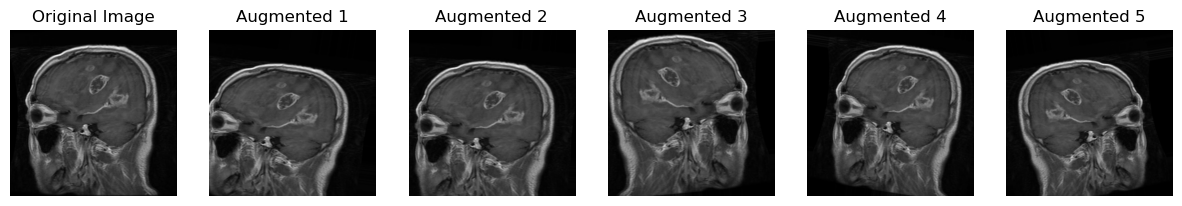

The images above ^ illustrate how augmentation techniques, such as rotation, shifting, shearing, zooming, and flipping, are applied to the original image, effectively 'expanding' the dataset by creating diverse variations of the same input.



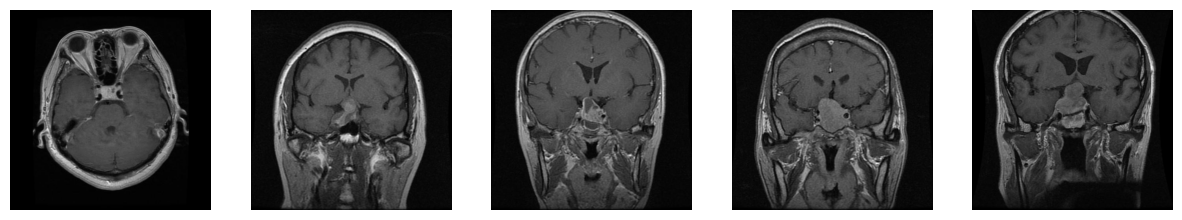

The images above are five randomly selected examples from the dataset after augmentation. These are provided here to further demonstrate how the augmentation process introduces subtle shifts and transformations in the training images, enhancing the variety within the dataset.

### Preprocessing

#### Encoding
I performed label encoding and one-hot encoding to convert categorical labels into a suitable format for multi-class classification. I also set up ImageGenerator which generated batches of data for training and validation. The one-hot encoded labels were ensured to be of type float32 for compatibility with TensorFlow models.

In this case there were four classes: 1, 2, 3, 4 (each category of tumor/absence of a tumor)


#### Class Weights

I computed class weights to address class imbalance within the dataset. I utilized the class_weight.compute_class_weight() function to calculate the weight for each class, specifying the parameter 'balanced' to ensure that each class contributed equally to the model during training. I provided the unique classes present in the dataset, derived from the encoded training labels, and included the training labels as inputs. The resulting class_weights array contained values that assigned higher weights to classes with fewer samples and lower weights to those with more samples. I then converted this array into a dictionary, class_weight_dict, where each key represented the class label and the corresponding value was the computed weight for that class. This dictionary was intended to be used during model training, allowing the model to account for class imbalance by penalizing misclassifications of minority classes more heavily, thereby promoting fairer predictions.

### Modeling: Convolutional Neural Network

1. Why I chose CNN:

- Choosing a Convolutional Neural Network (CNN) for this project was ideal due to its effectiveness in handling image data. CNNs are designed to recognize patterns and features in images, making them great for tasks like image classification. They use layers that automatically learn to identify important features, such as edges and textures, which are essential for distinguishing between different classes of images. Additionally, CNNs are more efficient than traditional neural networks because they require fewer parameters. This not only speeds up training but also helps prevent overfitting, allowing the model to perform better on new, unseen data. By using a pre-trained model like MobileNet, I could leverage existing knowledge from large datasets, which improved the model's  need for extensive computational resources. Overall, a CNN was a great choice for achieving effective and efficient image classification in this project.


2. How I built the model:

- In this code, I defined a model using the MobileNet architecture to leverage its pre-trained weights for image classification. I began by initializing the MobileNet model without its top layer, allowing me to build a custom model on top of it. I constructed a Sequential model and added an input layer that accepted images with dimensions of 224x224 pixels and three color channels. I then integrated the MobileNet base model into my architecture, followed by a Flatten layer to convert the 2D feature maps into a 1D vector. To enhance the model's learning capacity, I included a fully connected Dense layer with 128 neurons and a ReLU activation function, along with a Dropout layer to prevent overfitting by randomly setting half of the neurons to zero during training. The output layer was configured with a softmax activation function to handle multi-class classification based on the number of unique classes in my dataset. I compiled the model using the Adam optimizer with a learning rate of 1e-4 and categorical cross-entropy as the loss function, optimizing for accuracy. Additionally, I implemented callbacks, including ModelCheckpoint to save the best model based on validation loss and EarlyStopping to halt training if no improvement was observed for three consecutive epochs. I trained the model using the training and validation generators, running for 10 epochs while monitoring its performance through the specified callbacks.

3. Limitations:

- In my initial attempts to build the model, I explored using a VGG16 pre-trained model for image classification. However, I encountered challenges due to the limitations of my computational power. The VGG16 architecture is relatively large and requires significant memory and processing resources, which resulted in slow training times and performance issues on my hardware. Consequently, I decided to switch to the MobileNet architecture, which is more lightweight and efficient, allowing me to leverage transfer learning without overwhelming my system.

### Model Performance


115/115 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.7868 - loss: 0.8391 - val_accuracy: 0.1953 - val_loss: 3.0346
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9558 - loss: 0.1224 - val_accuracy: 0.1953 - val_loss: 4.5989
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.9746 - loss: 0.0775 - val_accuracy: 0.2090 - val_loss: 4.8875
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9830 - loss: 0.0547 - val_accuracy: 0.4805 - val_loss: 3.0448

##### In the training process of the model over four epochs, the following observations were made:

Epoch 1: 

  - The model achieved a training accuracy of 78.68% with a loss of 0.8391, while the validation accuracy was low at 19.53% with a corresponding loss of 3.0346.



Epoch 2: 

  - Training accuracy improved significantly to 95.58%, with a loss of 0.1224. However, the validation accuracy remained unchanged at 19.53%, and the loss increased to 4.5989.



Epoch 3: 

 - The model's training accuracy further increased to 97.46% with a loss of 0.0775, but the validation accuracy only slightly rose to 20.90%, and the loss continued to climb to 4.8875.



Epoch 4: 

 - Training accuracy reached 98.30% with a loss of 0.0547. Notably, the validation accuracy improved to 48.05%, and the loss decreased to 3.0448, indicating some progress in generalization.

##### The model stopped training at Epoch 4 despite coding for 10...

The model stopped training at Epoch 4 because I implemented the EarlyStopping callback, which monitored the validation loss and halted training when improvements stalled, specifically after 3 epochs without improvement. 

This mechanism is an important feature when training deep learning models because it saves computational resources and helps ensure that the model does not start to memorize the training data. 

### Evaluation of Model on Unseen Data

##### 16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 503ms/step - accuracy: 0.1922 - loss: 3.0401
Validation Loss: 3.0346
Validation Accuracy: 0.1953





- Validation Loss: 3.0346: This value indicates the average loss across the validation dataset, which reflects how well the model's predictions align with the actual labels. A higher loss generally indicates worse performance.



- Validation Accuracy: 0.1953: This value indicates that the model correctly classified approximately 19.53% of the validation images, suggesting that the model is struggling to generalize to the validation data.



Predicted classes: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]



Predicted Classes: The array [2, 2, 2, 2, ...] suggests that every image in the test set is classified as class 2.

This could imply:

Model Limitations: The model may not have learned the distinguishing features of the other classes, resulting in it defaulting to predicting the most frequent class.

Underfitting: The model might be too simple to capture the complexity of the data. I thought this could happen since the dataset includes images from different planes (sagittal, transverse, coronal).

There could have been an issue when attempting to balance the classes.


Improvement:

- More Training: Train the model for more epochs to see if accuracy improves. Monitor training and validation accuracy/loss to avoid overfitting.

- Data Augmentation: Implement data augmentation techniques to increase the diversity of the training set and prevent overfitting.

- Hyperparameter Tuning: Experiment with different learning rates, batch sizes, and model architectures to find the optimal configuration.

- Model Complexity: Adjust the complexity of the model. I could add or remove layers, change the number of filters, or adjust the activation functions.

- Regularization Techniques: Implement dropout or other regularization techniques to prevent overfitting.

- Learning Rate Scheduling: Consider using learning rate schedules or callbacks to adjust the learning rate dynamically during training.

- Transfer Learning: I attempted to use transfer leanrning with VGG16 but the amount of storage and power of my compputer was too low to handle this method.

- Check Data Quality: Ensure that the labels are correct and that there’s no data leakage between training and validation sets.

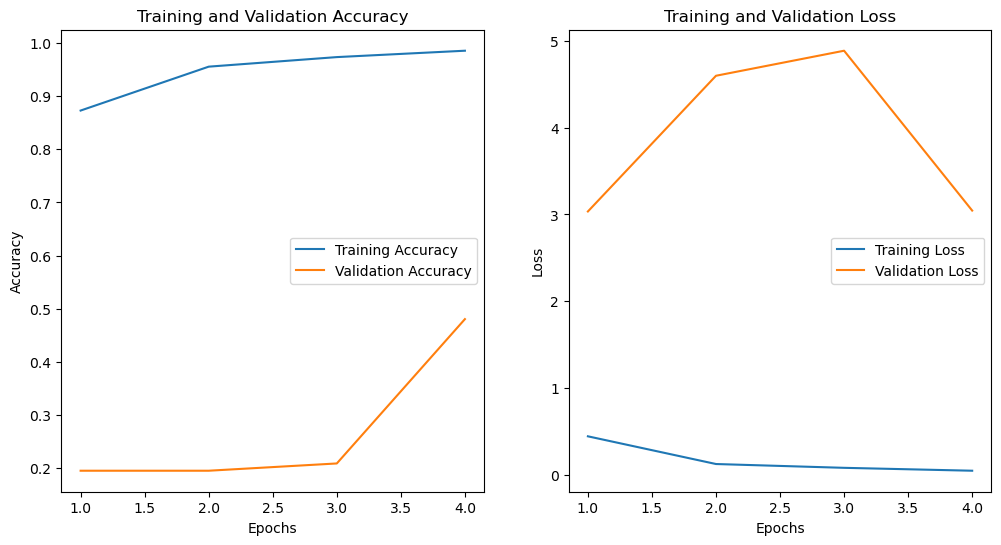

### Conclusion

In this project, I built and CNN model using pre-trained MobileNet architecture to classify MRI brain tumor images. The model was trained with transfer learning and regularization techniques to improve performance, but despite achieving 98.3% accuracy on the training data, the validation performance was significantly lower, with a validation accuracy fluctuating between 19.5% and 48.1% across the epochs.

This wide gap between training and validation accuracy strongly indicates overfitting. While the model was able to memorize the training data, it struggled to generalize to unseen validation data. The following factors may have contributed to this result:

- Data Complexity: 

The dataset included images from different planes (sagittal, transverse, coronal), which may have added complexity, making it harder for the model to generalize.

- Class Imbalance: The distribution of classes in the training data was imbalanced, possibly skewing the model toward predicting the majority class. Although I attempted to weight the classes, it seems this method was not enough.


- Limited Validation Accuracy:

The validation accuracy plateaued at 48.1%, indicating the model failed to capture meaningful patterns for the other classes, as shown by misclassifications and a bias towards predicting class 2 in most cases.


- Areas for Improvement:

To enhance the model's performance, I would focus on the following areas:


 - Data Augmentation: I could incorporate more diverse data augmentation techniques to better represent variations within the training data and help prevent overfitting.
 - Hyperparameter Tuning: Experiment with learning rates, batch sizes, and dropout rates could improve generalization.

 - Model Architecture: Exploring a VGG16 pre trained model might reduce overfitting.
